Q1. KNN CLASSIFIER

In [2]:
import numpy as np
import pandas as pd

In [40]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
dry_bean = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
  
# metadata 
print(dry_bean.metadata) 
  
# variable information 
print(dry_bean.variables) 


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [4]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [5]:
y.head()

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER


Task 1

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
scalers = {
    'Min-Max Scaling': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

In [8]:
results = {}
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k if needed
knn.fit(X_train, y_train)
    
# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
results["Not Scaled"] = accuracy

for scaling_name, scaler in scalers.items():
    # Scale the data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k if needed
    knn.fit(X_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[scaling_name] = accuracy

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ne

In [9]:
for k,v in results.items():
    print(k, "->", v)

Not Scaled -> 0.7113124387855044
Min-Max Scaling -> 0.9196865817825661
Standardization -> 0.921645445641528
Robust Scaling -> 0.9189520078354554


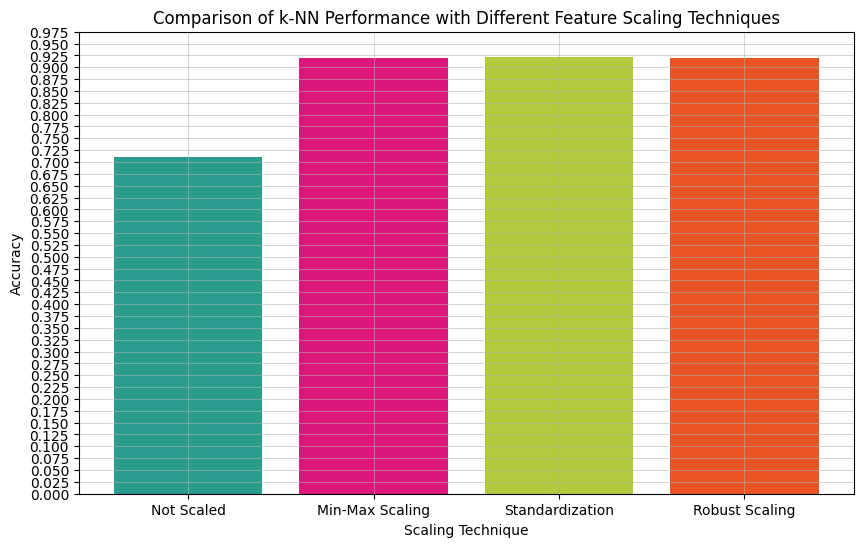

In [10]:
import matplotlib.pyplot as plt
# Plot the results
plt.figure(figsize=(10, 6))
colors = [ '#299c8e','#dc167b','#b5c93e', '#ea5424']
plt.bar(results.keys(), results.values(), color = colors)
plt.xlabel('Scaling Technique')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, 0.025))
plt.title('Comparison of k-NN Performance with Different Feature Scaling Techniques')
plt.grid(True, which='both', linestyle='-', linewidth=0.4)
plt.show()

Standardization yields the best overall performance with an accuracy score of 92.16%

Task 2

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_scaled = StandardScaler().fit_transform(X_train)    
X_test_scaled = StandardScaler().fit_transform(X_test)
    
# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust k if needed
knn.fit(X_train_scaled, y_train)
    
# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [12]:
Roundness = X['Roundness'].mean()
Compactness = X['Compactness'].mean()

In [13]:
new_instance = pd.DataFrame({
    'Area': [42020],
    'Perimeter': [674.16],
    'MajorAxisLength': [208.81],
    'MinorAxisLength': [162.14],
    'AspectRatio': [1.29],
    'Eccentricity': [0.5174],
    'ConvexArea': [42530],
    'EquivDiameter': [231.01],
    'Extent': [0.7213],
    'Solidity': [0.9880],
    'Roundness':[Roundness],
    'Compactness':[Compactness],
    'ShapeFactor1': [0.4949],
    'ShapeFactor2': [0.9637],
    'ShapeFactor3': [0.9975],
    'ShapeFactor4': [0.9128]
})

# Scale the new instance
new_instance_scaled = scaler.transform(new_instance)

# Predict the class of the new instance
predicted_class = knn.predict(new_instance_scaled)

# Display the predicted target class
print(predicted_class[0])

DERMASON


The predicted target class is: DERMASON

Task 3

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: 

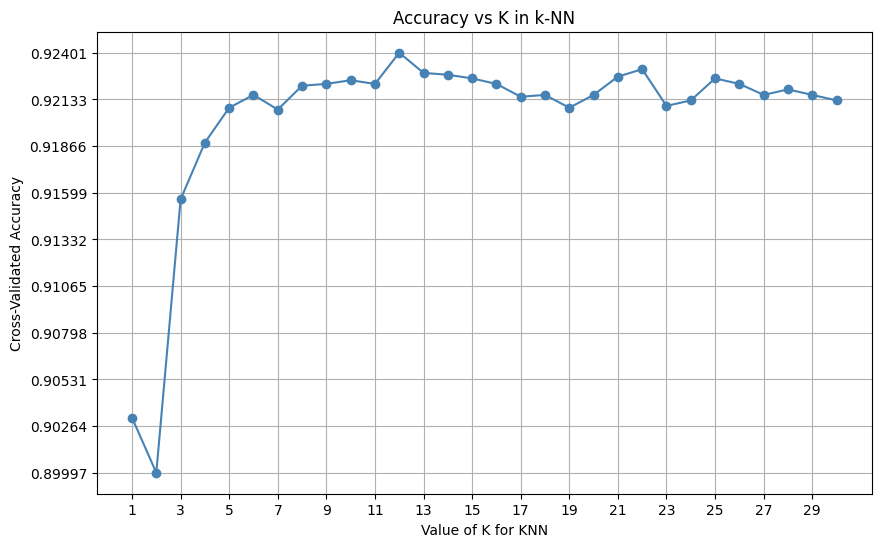

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Initialize a list to store cross-validation scores
k_range = range(1, 31)
scores_list=[]
k_scores = []
# Perform cross-validation for different values of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
    val_scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_scores.append(val_scores.mean())
    
# Plot k values against accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', color='#4682B4')  # Blue color for a calm tone
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs K in k-NN')
plt.grid(True)  # Add grid for better readability
plt.xticks(np.arange(1, 31, 2))  # Add more ticks on x-axis for clarity
plt.yticks(np.linspace(min(k_scores), max(k_scores), 10))  # Add more y-ticks
plt.show()

Task 4

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)    
X_test_scaled = scaler.transform(X_test)

# Train k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
y_pred_prob = knn.predict_proba(X_test_scaled)

# Encode the labels for ROC AUC calculation
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob, multi_class='ovr')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")



c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9216
Precision: 0.9221
Recall: 0.9216
F1-Score: 0.9218
ROC AUC Score: 0.9844


c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Task 5

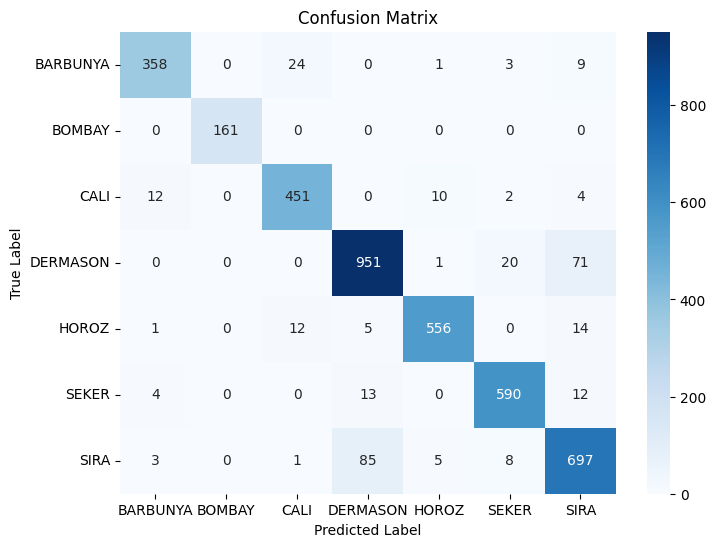

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

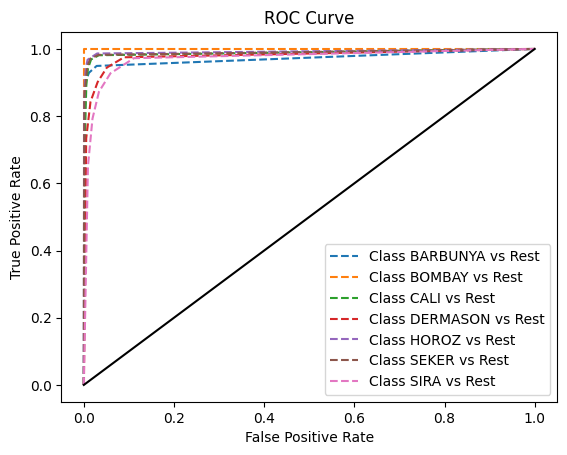

In [35]:
# Plot ROC Curve for each class
fpr = {}
tpr = {}
thresh = {}
n_class = len(np.unique(y_test_encoded))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_encoded, y_pred_prob[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {np.unique(y_test)[i]} vs Rest')

plt.plot([0, 1], [0, 1], color='black', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

Q2. LOGISTIC REGRESSION

In [81]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [43]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [44]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


Task 1

In [71]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [52]:
y.isnull().sum()

income    0
dtype: int64

In [72]:
X.fillna(X.mode().iloc[0], inplace=True)

C:\Users\panse\AppData\Local\Temp\ipykernel_13008\2962739818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mode().iloc[0], inplace=True)


In [73]:
X.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

Task 2

In [82]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_columns)

Categorical Features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


Ordinal Encoding: For categorical variables having an inherent order (e.g., education).

One-Hot Encoding: For nominal categorical features where there is no ordinal relationship (e.g., marital status, occupation, race).

In [75]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [83]:
X['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [84]:
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ordinal_encoder = OrdinalEncoder(categories=[education_order])
X['education'] = ordinal_encoder.fit_transform(X[['education']])

C:\Users\panse\AppData\Local\Temp\ipykernel_13008\1569342945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = ordinal_encoder.fit_transform(X[['education']])


In [85]:
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Features:", categorical_columns)

Categorical Features: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [86]:
encoded_X = pd.get_dummies(X, columns = categorical_columns)
encoded_X.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,12.0,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,12.0,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,8.0,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,6.0,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,12.0,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Task 3

In [95]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix after encoding categorical features
scaler = StandardScaler()

# Fit and transform the data
encoded_X[encoded_X.columns] = scaler.fit_transform(encoded_X[encoded_X.columns])
scaled_X = encoded_X


In [96]:
scaled_X.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.025996,-1.061979,1.130568,1.136512,0.146932,-0.217127,-0.034087,-0.197633,-0.173795,-0.26194,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
1,0.828308,-1.007104,1.130568,1.136512,-0.144804,-0.217127,-2.213032,-0.197633,-0.173795,-0.26194,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
2,-0.046942,0.246034,-0.422147,-0.419335,-0.144804,-0.217127,-0.034087,-0.197633,-0.173795,-0.26194,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
3,1.047121,0.426663,-1.198504,-1.197259,-0.144804,-0.217127,-0.034087,-0.197633,-0.173795,-0.26194,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,0.338083,-0.041999,-0.021705
4,-0.776316,1.408530,1.130568,1.136512,-0.144804,-0.217127,-0.034087,-0.197633,-0.173795,-0.26194,...,-0.037063,-0.061494,-0.02074,-0.048581,-0.036505,-0.024791,-0.023518,-2.957854,-0.041999,-0.021705


In [97]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


Task 4

In [99]:
from sklearn.linear_model import LogisticRegression
scaled_X_train, scaled_X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [100]:
model = LogisticRegression(max_iter=1000)
model.fit(scaled_X_train, y_train)

# Make predictions
y_pred = model.predict(scaled_X_test)
y_prob = model.predict_proba(scaled_X_test)

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
# Calculate accuracy, precision, recall, F1-score
y_test_encoded = le.fit_transform(y_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')

# Print metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"ROC AUC Score: {roc_auc:.4f}")

c:\Users\panse\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.59
Precision: 0.66
Recall: 0.59
F1 Score: 0.50
ROC AUC Score: 0.7822


Task 5

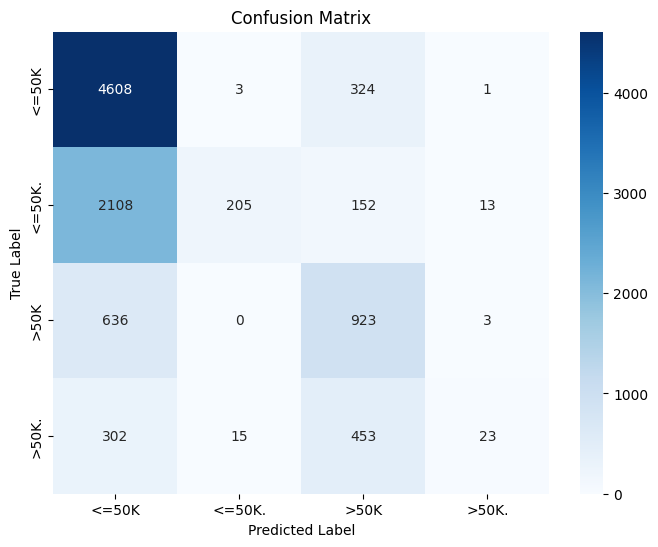

In [104]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

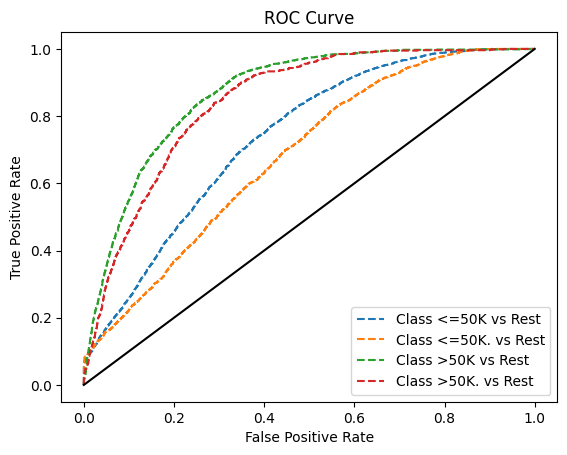

In [105]:
# Plot ROC Curve for each class
fpr = {}
tpr = {}
thresh = {}
n_class = len(np.unique(y_test_encoded))

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_encoded, y_prob[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'Class {np.unique(y_test)[i]} vs Rest')

plt.plot([0, 1], [0, 1], color='black', linestyle='-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()